# CREDIT CARD FRAUD DETECTION

**TASK:** CREDIT CARD FRAUD DETECTION

**Name:** Olawumi Leah Titilayo

**Batch:** June batch A55

**Task:** Build a machine learning model that identify fradulent credit card transactions. Preprocess and normalize the transaction data, handle class imbalance issues, and split the data into trainn and test sets.

In [1]:
#import dataset
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset information

In [2]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Checking the number of missing values in each column

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.shape

(284807, 31)

# Let's check if there is duplicate values

In [5]:
df.duplicated().sum()

1081

In [6]:
df = df.drop_duplicates()

df.shape

(283726, 31)

Duplicate data was present and which was dropped.

# Let's check for the unique data in the target variable(Class)

In [7]:
df['Class'].unique()

array([0, 1], dtype=int64)

# Distribution of valid transaction and fraud cases

In [8]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

This shows that data is highly imbalanced

In [9]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

print('Valid Transactions: ', valid.shape)
print('Fraud Cases: ', fraud.shape)


Valid Transactions:  (283253, 31)
Fraud Cases:  (473, 31)


In [10]:
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

   **Summary:** Valid contain normal transactions(Class = 0) and fraud contain fraudlent transactions(Class = 1).We count the number of each transactions using count method and finally print the number of valid and fraud transactions.

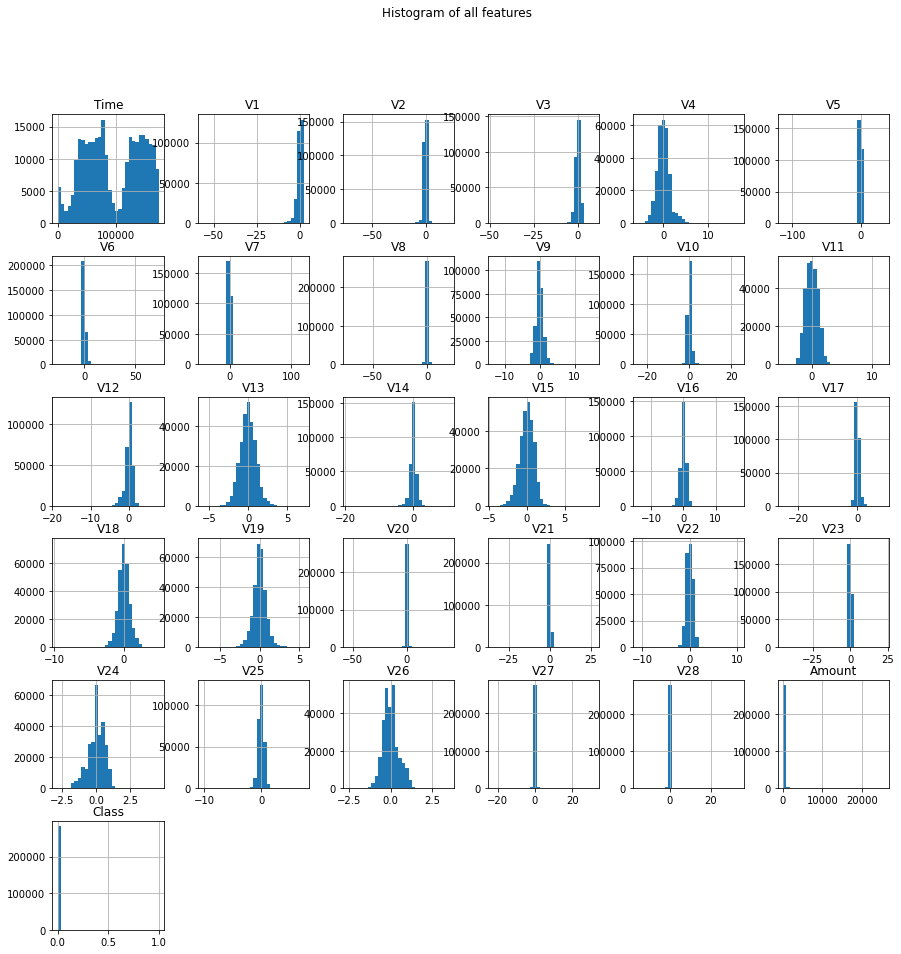

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(15,15), bins = 30)
plt.suptitle('Histogram of all features')
#track
plt.show()


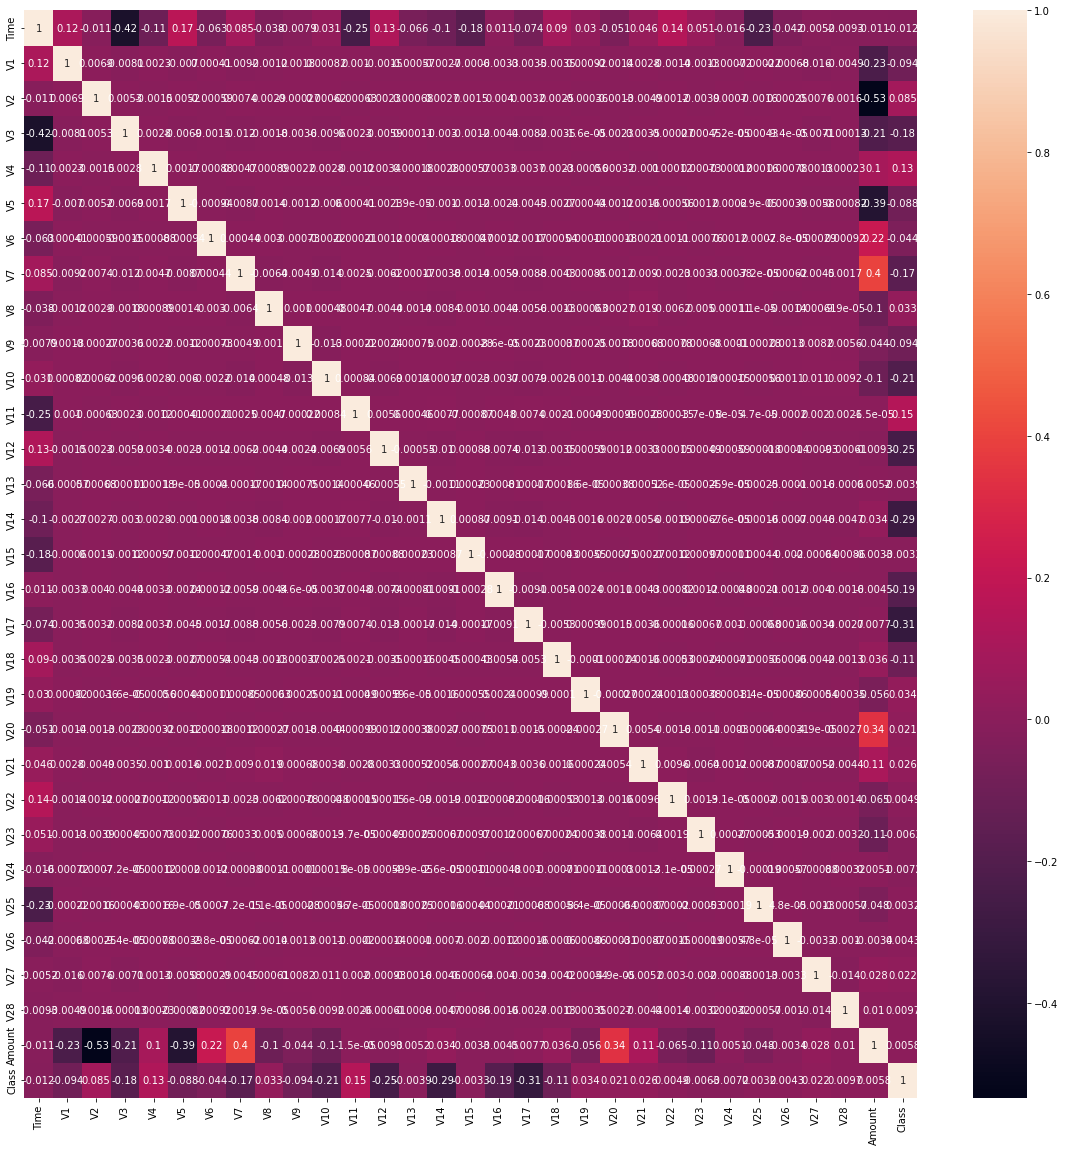

In [13]:
#correction
fig = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

plt.show()

To build a model that predicts whether to identify fradulent credit card transactions, we will follow these steps:

1. **Data Preprocessing:** Class imbalance Encode categorical variables, and scale numerical features.
2. **Model Building:** Use a machine learning algorithm to build the model.
3. **Model Evaluation:** Evaluate the model's performance using appropriate metrics.
Let's start with data preprocessing.

Step 1: Data Preprocessing
1. Nomalizaation
2. Class imbalance
3. Encode categorical variables.
4. Scale numerical features.
I'll start by handling class imbalance and encoding categorical variables.




In [14]:
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

smote = SMOTE(random_state = 42)
X_resampled,y_resampled = smote.fit_resample(X, y)

In [15]:
y_resampled.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

Imbalanced data handled.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Data preprocessing completed.')

Data preprocessing completed.


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_train, y_train))

MinMaxScaler()


In [18]:
print(scaler.data_max_)

[ 1.75322566  0.90960056  5.90367399  2.1738371   4.68816474  8.90432514
 15.32416762  8.80124097  5.0492929   7.76254179  6.32241454  3.80362419
  2.48337264  4.62971527  3.13682981  6.38521741  3.13166078  2.20539392
  2.68118171  4.50303406 39.92845152 15.2088057  11.61246608 23.69500397
  7.55718421 12.15663075  7.915084   14.3916146  56.02437835 88.70674613]


In [19]:
print(scaler.data_min_)

[ -1.80505633  -8.54110801 -18.94897262  -5.12268919  -2.53194842
  -9.73369881 -14.14313225  -7.70026109 -19.11848978  -5.58022254
  -5.20382022  -2.50687778  -3.5354025   -5.77691174  -3.52412748
  -4.85119675  -3.67719154  -3.85260069  -3.67713026  -6.47527999
 -28.72753033 -19.76926841 -12.1824346  -39.22527048  -5.15646954
 -14.14512495  -5.96995512 -27.09147197 -29.16828467  -0.43853056]


In [20]:
print(scaler.transform(X_train))

[[2.42258424e-01 5.60237505e-01 8.51684446e-01 ... 5.59019994e-01
  3.14657783e-01 6.68093926e-04]
 [8.68674476e-03 9.11065618e-01 7.62548356e-01 ... 6.49208317e-01
  3.45864947e-01 5.08736791e-05]
 [6.38959177e-01 9.24301920e-01 7.68619930e-01 ... 6.64476731e-01
  3.39610441e-01 3.43346840e-05]
 ...
 [5.43359892e-01 6.98061088e-01 8.27114914e-01 ... 5.93990431e-01
  3.25531690e-01 1.68529825e-03]
 [4.62886013e-01 9.75752983e-01 7.41140697e-01 ... 6.51292137e-01
  3.41847909e-01 2.28931556e-04]
 [4.43064494e-01 9.40781148e-01 7.51303373e-01 ... 6.46199513e-01
  3.39729840e-01 0.00000000e+00]]


Normalization done.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Model Accuracy:', accuracy)
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Model Accuracy: 0.9999117403046724
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Confusion Matrix:
 [[56453    10]
 [    0 56839]]


**Summary:**
 1. **Model Accuracy:** The model achieved an accuracy of approximately 99.99%.
 2. **Classification Report:** The precision, recall, and F1-score for both classes (0: Valid transactions, 1: Fraud transactions) are provided. The model performs well in predicting the transaction
 3. **Confusion Matrix:** The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. It perform well in predicting the fraud transaction and perform better in predicting valid transaction.